In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import necessary libraries and 
uploading our dataset from file directory

In [2]:
# loading file from a local directory
df = pd.read_csv(r'C:/Users/test/Documents/tochora/baba/final_data.csv', encoding='latin-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df.info

<bound method DataFrame.info of                                              tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  ÂÃÂ¡ÂÃÃ ÂÃ¼_ÂÂÃÂÂÃÂÂÃÂÂÂ£ÂÂÃ...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                

In [4]:
# shape of the dataset
df.shape

(9093, 3)

our dataset contains 9093 rows and 3 columns

In [5]:
# columns in our dataset
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [6]:
df.columns = ['text', 'product', 'emotion']
df.head()

,text,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
#checking null values
df.isnull().sum()

text          1
product    5802
emotion       0
dtype: int64

The product column has a lot of null values thus unimportant in our analysis thus we are going to drop it.

In [8]:
df.drop(columns='product', axis=1,inplace=True)
df.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [9]:
df.isnull().sum()

text       1
emotion    0
dtype: int64

text column has 0ne null value thus we are going to drop it.

In [10]:
df.dropna(inplace=True)

Combining I can't tell with no emotion toward the product or barnd as the feeling is the same.

In [11]:
# replacing I cant tell column with no emotion on barnd or product
df['emotion'].replace(["I can't tell", "No emotion toward the brand or product"], inplace=True)
df['emotion'].value_counts()

No emotion toward brand or product    5477
Positive emotion                      3030
Negative emotion                       585
Name: emotion, dtype: int64

In [12]:
# variables in the emotion columnand their frequncies
df['emotion'].value_counts()

No emotion toward brand or product    5477
Positive emotion                      3030
Negative emotion                       585
Name: emotion, dtype: int64

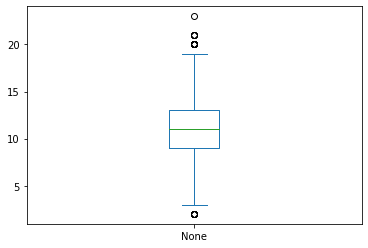

In [38]:
# calcualating texts length and plottting their distribution
text_len = pd.Series(len(review.split()) for review in df['text'])
text_len.plot(kind='box')
plt.show()



In [14]:
df['emotion'].value_counts()

No emotion toward brand or product    5477
Positive emotion                      3030
Negative emotion                       585
Name: emotion, dtype: int64

A wordcloud of the various emotions as conveyed by the tweets.The wordclouds contains the conspicous words from the text.

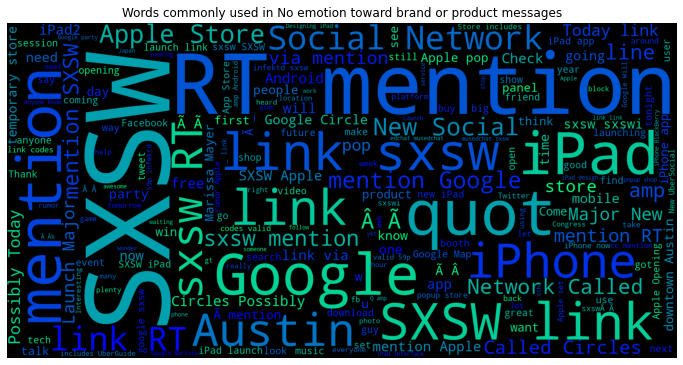

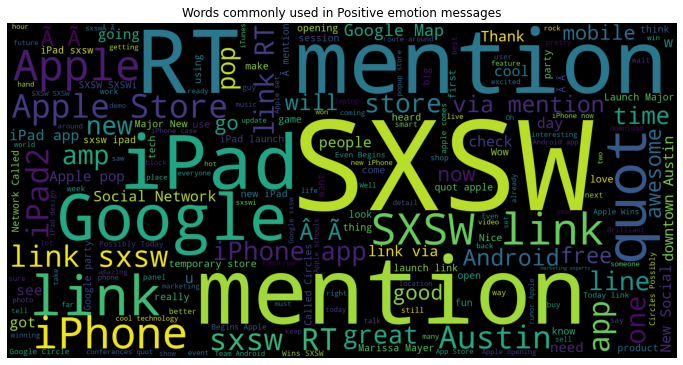

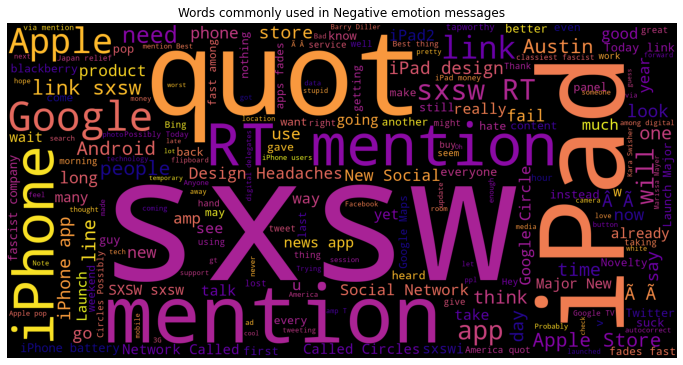

In [15]:
from wordcloud import WordCloud
for label, cmap in zip(['No emotion toward brand or product', 'Positive emotion', 'Negative emotion'],['winter', 'viridis', 'plasma']):

    text = df.query('emotion==@label')['text'].str.cat(sep=" ")
    plt.figure(figsize=(12, 10))
    wm = WordCloud(min_font_size=10,height=800, width=1600, background_color='black', colormap=cmap)
    wm.generate_from_text(text)
    plt.imshow(wm)
    plt.axis('off')
    plt.title(f'Words commonly used in {label} messages')





mapping emotions into numeric values where : Positive emotions = 1, Negative emotions = 0 while no emotion toward  a product or brand=2

In [16]:
emotionmapping = {'Positive emotion':1, 'Negative emotion':0, 'No emotion toward brand or product':2}
df['emotionmapped'] = df['emotion'].map(lambda x : emotionmapping[x])
df.head()


,text,emotion,emotionmapped
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,1


variables in the emotion column and their aggregate frequencies

In [17]:
df['emotion'].value_counts()

No emotion toward brand or product    5477
Positive emotion                      3030
Negative emotion                       585
Name: emotion, dtype: int64

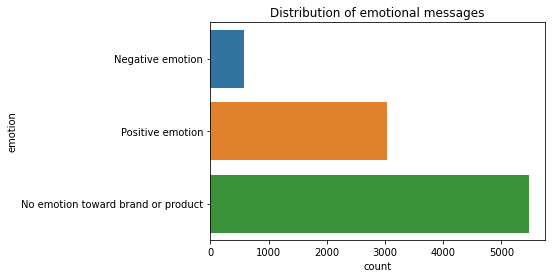

In [18]:
sns.countplot(y=df['emotion'])
plt.title('Distribution of emotional messages')
plt.show()

No emotion toward brands or product has the longest bar which shows that most of the reviews were of neutral nature while negative emotion have the shortest bar showing that it Negative reviews were few.

Text processing

In [19]:
# changing words from the proper case into lower case
import re
df['text'] = df['text'].apply(lambda x : x.lower())
df.head()


,text,emotion,emotionmapped
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,Negative emotion,0
1,@jessedee know about @fludapp ? awesome ipad/i...,Positive emotion,1
2,@swonderlin can not wait for #ipad 2 also. the...,Positive emotion,1
3,@sxsw i hope this year's festival isn't as cra...,Negative emotion,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Positive emotion,1


Removing hyperlinks from the text in our dataset.

In [20]:
#removing urls
df['text'] = df['text'].apply(lambda x: re.sub('http[s]?://\S+', ' ', x))


Removing puctuation marks from the text and other non-alphabetical characters

In [21]:
#removing puctuation marks
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-z]+', ' ', x))

In [22]:
df.head()

,text,emotion,emotionmapped
0,wesley i have a g iphone after hrs tweeting a...,Negative emotion,0
1,jessedee know about fludapp awesome ipad ipho...,Positive emotion,1
2,swonderlin can not wait for ipad also they sh...,Positive emotion,1
3,sxsw i hope this year s festival isn t as cra...,Negative emotion,0
4,sxtxstate great stuff on fri sxsw marissa may...,Positive emotion,1


In [23]:
# merging different spaces into ingle space
df['text'] = df['text'].apply(lambda x: " ".join(x.split()))

coming up with the length column so as to show different lengths of the tweets in the text column.

In [24]:
# lemgth of characters in our text
df['Length'] = df['text'].apply(len)
df.head()

,text,emotion,emotionmapped,Length
0,wesley i have a g iphone after hrs tweeting at...,Negative emotion,0,112
1,jessedee know about fludapp awesome ipad iphon...,Positive emotion,1,132
2,swonderlin can not wait for ipad also they sho...,Positive emotion,1,72
3,sxsw i hope this year s festival isn t as cras...,Negative emotion,0,79
4,sxtxstate great stuff on fri sxsw marissa maye...,Positive emotion,1,119


In [25]:
# removing stopwords
# a function to apply stopwords
import nltk
from nltk.corpus import stopwords
def stopwords_removal(text):
    return [w for w in text.split() if w not in stopwords.words('english')]

In [26]:
df['text'] = df['text'].apply(stopwords_removal)

Filtering the text by removing stopwords thus weeding out common words or those that make vacuous  features from it.

In [27]:
# dropping the length column 
df.drop(columns=['Length'],axis=1, inplace=True)

In [28]:
#a function to apply wordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    return[lemmatizer.lemmatize(w) for w in text]

In [29]:
df['text'] = df['text'].apply(lemmatize)

WordNetLemmatizer is applied to stem words in the text into their basic linguistic forms.it mappes various variations of  a word into the same word.

In [30]:
# removing rare words
def rare_word_removal(text):
    return[w for w in text if len(w) >1 and w!='sxsw']

In [31]:
df['text'] = df['text'].apply(rare_word_removal)

applying a function to remove the rare word 'sxsw' since it is noise rather than being important information. 

In [32]:
# joining words to form a review
df['text'] = df['text'].apply(lambda x : ' '.join(x))

In [33]:
df.head()

,text,emotion,emotionmapped
0,wesley iphone hr tweeting rise austin dead nee...,Negative emotion,0
1,jessedee know fludapp awesome ipad iphone app ...,Positive emotion,1
2,swonderlin wait ipad also sale,Positive emotion,1
3,hope year festival crashy year iphone app,Negative emotion,0
4,sxtxstate great stuff fri marissa mayer google...,Positive emotion,1


Bag of words

In [35]:
#applying tfidvectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(ngram_range=(1, 3), max_features= 100000)
# 
x = df['text']
y = df['emotion']


segmentation of our data into two parts. x to represent data tobe trained where y to represent data to be tested.TFIdvecorizer is used to put more weight on few words that are less frequent but important.

In [36]:
# splittting our dataset into 75% training data and the remaining test data 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)
x_train = tfid.fit_transform(x_train)
x_test = tfid.transform(x_test)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# fittting our model
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test)
print(acc)
pred = lr.predict(x_test)

0.7017157941047074


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

                                    precision    recall  f1-score   support

                  Negative emotion       0.04      0.86      0.08         7
No emotion toward brand or product       0.89      0.71      0.79      1703
                  Positive emotion       0.50      0.67      0.57       563

                          accuracy                           0.70      2273
                         macro avg       0.47      0.75      0.48      2273
                      weighted avg       0.79      0.70      0.73      2273

